# UTS

NAMA  : SHOFIATUL AYU ANIKANINGRUM

KELAS : TI - 3F

ABSEN : 29

NIM   : 2141720048

## Ketentuan UTS

Berdasarkan pemaparan kasus, Anda diminta untuk,

1. Pilih 5 citra plat nomor untuk setiap anggota kelompok dari dataset yang telah disediakan. DOWNLOAD
2. Lakukan segmentasi pada citra plat nomor untuk memperjelas karakter pada plat nomor.
3. Anda dapat menggunakan algortima K-Means seperti yang telah dijelaskan pada praktikum sebelumnya atau menggunakan algoritma klasterisasi yang lain.
4. Anda diperkenankan untuk melakukan pra pengolahan data (preprocessing) pada citra seperti,
    - Merubah color space
    - Reduksi dimensi
    - dsb
5. Tampilkan perbandingan citra antara sebelum dan sesudah di segmentasi

**Open Challange** (Opsional)

   - Bagaimana cara melakukan evaluasi pada hasil segementasi?
   - Terapkan pada kasus ini!

**Catatan:**

1. Proses loading citra dicontohkan dengan menggunakan library openCV
2. Secara default, openCV akan memuat citra dalam format BGR

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.cluster import MiniBatchKMeans


In [28]:
conda install scikit-learn


Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.




==> WARNING: A newer version of conda exists. <==
  current version: 4.12.0
  latest version: 23.9.0

Please update conda by running

    $ conda update -n base -c defaults conda




In [29]:
pip install --upgrade scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [31]:
pip install threadpoolctl==3.1.0


  Attempting uninstall: threadpoolctl
    Found existing installation: threadpoolctl 2.2.0
    Uninstalling threadpoolctl-2.2.0:
      Successfully uninstalled threadpoolctl-2.2.0
Note: you may need to restart the kernel to use updated packages.


In [2]:
image_files = (
    'plat1.jpg',
    'plat2.jpg',
    'plat3.jpg',
    'plat4.jpg',
    'plat5.jpg'
)

images = []

for img_path in image_files:
        img = cv2.imread(img_path)
        if img is not None:
            images.append(img)
        else:
            print(f"Failed to read image from {img_path}")

  


In [3]:
# Fungsi untuk mengonversi warna BGR ke RGB
def bgr_to_rgb(img):
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img_rgb

# Fungsi untuk mengubah data gambar ke format yang sesuai
def scale_data(img):
    h, w, ch = img.shape
    data = img / 255.0
    data = data.reshape(h * w, ch)
    return data

In [4]:
# Fungsi untuk menampilkan distribusi warna
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(8, 4))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=14)

In [5]:
# Fungsi untuk membandingkan gambar asli dan hasil segmentasi
def img_comparison(original, new_colors):
    new_plate = new_colors.reshape(original.shape)
    fig, ax = plt.subplots(1, 2, figsize=(16, 6), subplot_kw=dict(xticks=[], yticks=[]))
    fig.subplots_adjust(wspace=0.05)
    ax[0].imshow(original)
    ax[0].set_title('Original Image', size=16)
    ax[1].imshow(new_plate)
    ax[1].set_title('2-color Image', size=16)


In [6]:
# Fungsi untuk melakukan segmentasi dengan K-Means
def kmeans_cluster(original):
    original_rgb = bgr_to_rgb(original)
    data = scale_data(original_rgb)

    kmeans = MiniBatchKMeans(2, n_init=16)
    kmeans.fit(data)
    new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

    plot_pixels(data, colors=new_colors, title="Reduced color space: 16 colors")
    img_comparison(original_rgb, new_colors)


<function matplotlib.pyplot.show(close=None, block=None)>

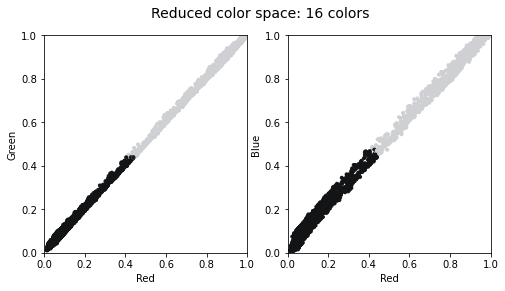

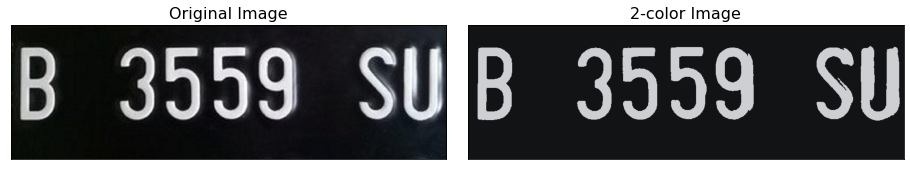

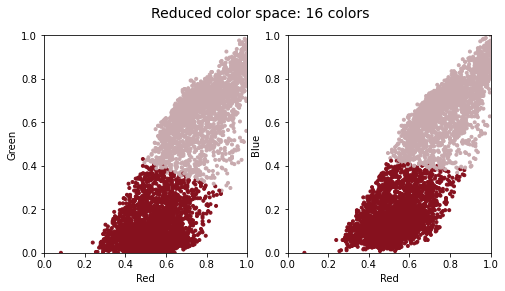

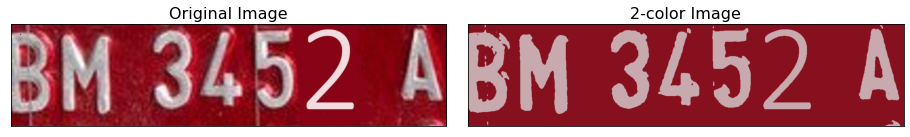

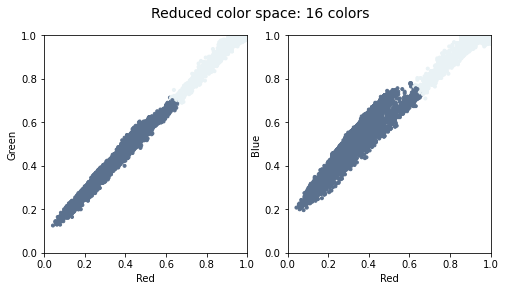

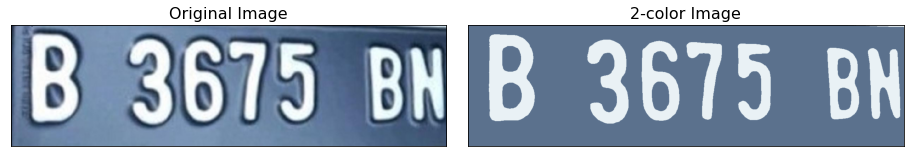

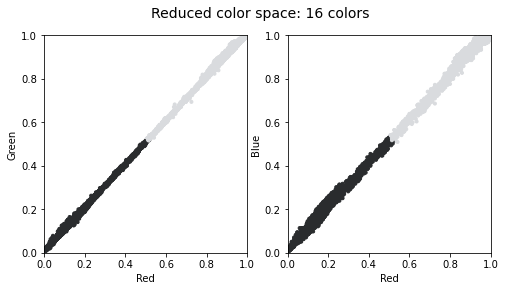

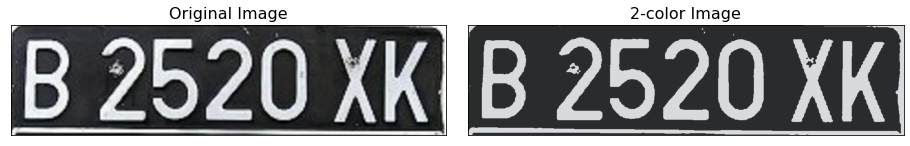

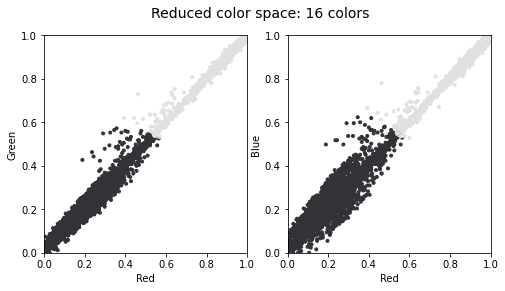

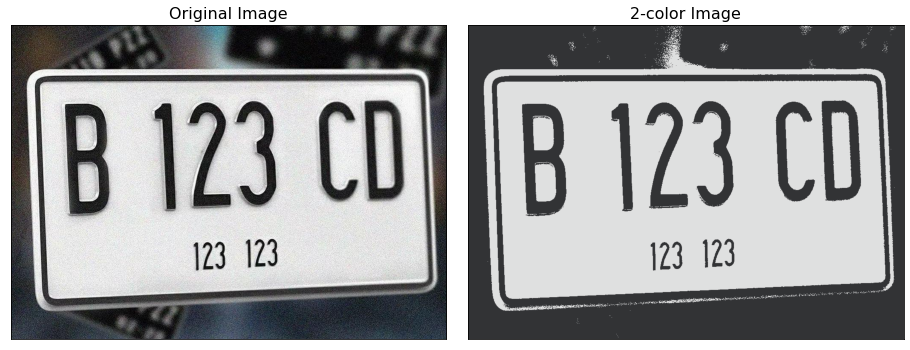

In [7]:
for img in images:
    kmeans_cluster(img)
    
plt.show
